<a href="https://colab.research.google.com/github/dropthejase/ml_training/blob/main/ml_from_scratch/kmeans_hard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**CREATE SOME DATA, STORE THE MEANS**

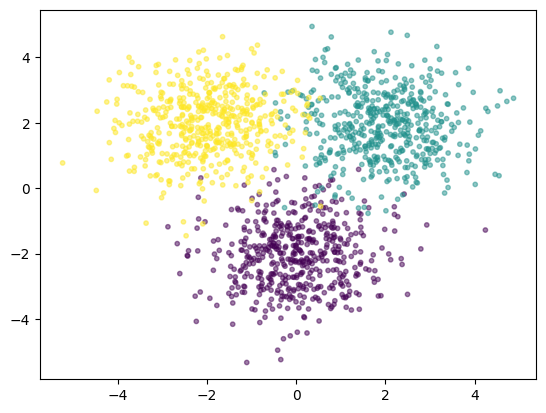

In [4]:
# Make dataset
N_samples = 500

X1 = np.random.randn(N_samples, 2) + np.array([0, -2])
X2 = np.random.randn(N_samples, 2) + np.array([2, 2])
X3 = np.random.randn(N_samples, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]) # vertically stacks

Y = np.array([0]*N_samples + [1]*N_samples + [2]*N_samples)

plt.scatter(X[:,0], X[:,1], c=Y, s=10, alpha=0.5)
plt.show()

In [5]:
K = 3
D = 2

K_means = np.zeros((K, D))

for i in range(K):
  K_means[i,:] = X[Y == i].mean(axis=0)

K_means

array([[-0.00392444, -2.05426189],
       [ 1.95847924,  1.93659646],
       [-2.00190289,  1.98075464]])

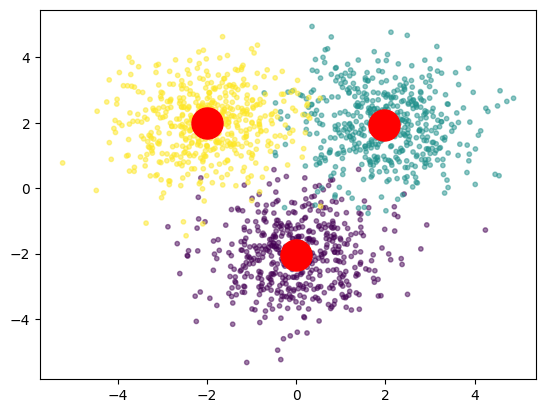

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=10, alpha=0.5)
plt.scatter(K_means[:,0], K_means[:,1], c='red', s=500)
plt.show()

**GIVEN SOME DATA, WHICH CLUSTER DOES IT BELONG TO?**

In [7]:
# Test Data
n_samples = 500
X4 = np.random.randn(n_samples, 2) + np.array([0, -2])
X5 = np.random.randn(n_samples, 2) + np.array([2, 2])
X6 = np.random.randn(n_samples, 2) + np.array([-2, 2])

X_test = np.vstack([X4, X5, X6])

**PUT IT ALL TOGETHER**

In [10]:
def kmeans(X, K, max_iter):
  N, D = X.shape
  loss = []

  # initialise means - pick random X
  means = np.zeros((K, D))
  for k in range(K):
    idx = np.random.choice(np.arange(N), replace=False)
    means[k] = X[idx]

  # initialise labels
  label = np.zeros(N)
  label_prev = np.ones(N)

  # main loop - while not converged
  iter = 0

  while (label == label_prev).mean() != 1 or (iter != max_iter):

    label_prev = label.copy()

    for n in range(N):
      dist = np.zeros(K)
      for k in range(K):
        dist[k] = np.sqrt(((X[n] - means[k])**2).sum())
      label[n] = np.argmin(dist)
    
    # calculate means for each label
    for idx, y in enumerate(set(label)):
      means[idx] = X[label == y].mean(axis=0)

    # calculate loss
    loss.append(kmeans_loss(X, label, means))
    print(f"Iteration: {iter + 1} \\ Loss: {kmeans_loss(X, label, means): .2f}")

    # iterate count + 1
    iter += 1

  return label, means, loss

def kmeans_loss(X, labels, means):
  N, D = X.shape
  K = len(set(labels))

  # create indicator matrix and dist_squared
  r = np.zeros((N, K))
  dist = np.zeros((N, K))

  for n in range(N):
    for k in range(K):
      r[n,k] = (k == label[n])
      dist[n,k] = ((X[n] - means[k])**2).sum()
  
  # elementwise multiplication
  return np.sum(r * dist)

Iteration: 1 \ Loss:  34355.98
Iteration: 2 \ Loss:  33141.81
Iteration: 3 \ Loss:  31975.25
Iteration: 4 \ Loss:  31229.35
Iteration: 5 \ Loss:  31082.91
Iteration: 6 \ Loss:  31039.02
Iteration: 7 \ Loss:  31039.02
Iteration: 8 \ Loss:  31039.02
Iteration: 9 \ Loss:  31039.02
Iteration: 10 \ Loss:  31039.02


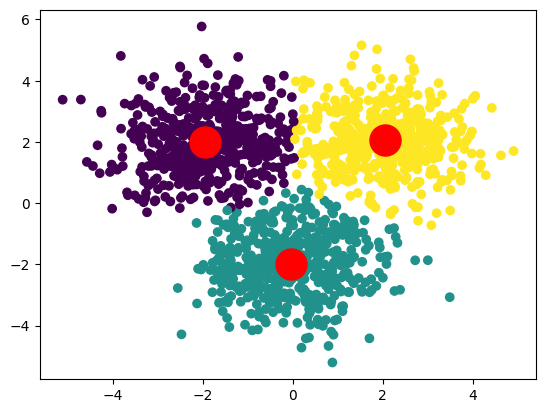

In [11]:
label, means, loss = kmeans(X_test, 3, 10)
plt.scatter(X_test[:,0], X_test[:, 1], c=label)
plt.scatter(means[:,0], means[:, 1], c='r', s=500)
plt.show()

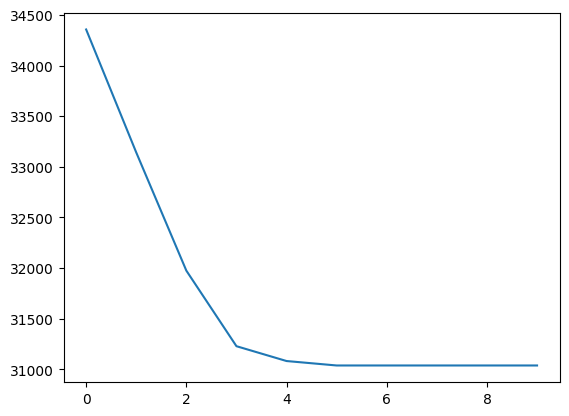

In [12]:
plt.plot(loss)